In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import requests 
import time

gun_violence = "gun_violence_data.csv"
gun_violence_pd = pd.read_csv(gun_violence)

gun_violence_pd.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [2]:
gun_types = pd.DataFrame({"source_string": gun_violence_pd["gun_type"]})

gun_types["source_clean"] = gun_types["source_string"].str.replace('\d+::', ',', regex=True).str.replace('\d+:', ',', regex=True).str.replace('|', '', regex=False).str[1:]

split_by_gun_df = gun_types["source_clean"].str.split(',', expand=True).rename(columns = lambda x: "gun_"+str(x))


gun_total = split_by_gun_df.apply(pd.value_counts)
                                                                    
gun_total["Total"] = gun_total.sum(axis=1)


most_common_guns = gun_total.sort_values(["Total"], ascending=False)

most_common_guns["Total"]

Unknown            131154.0
Handgun             25050.0
9mm                  6461.0
Rifle                5271.0
Shotgun              4271.0
22 LR                3358.0
40 SW                2749.0
380 Auto             2398.0
45 Auto              2368.0
38 Spl               1811.0
223 Rem [AR-15]      1613.0
12 gauge             1116.0
Other                1065.0
7.62 [AK-47]          940.0
357 Mag               824.0
25 Auto               612.0
32 Auto               490.0
20 gauge              207.0
44 Mag                198.0
30-30 Win             110.0
410 gauge              97.0
308 Win                93.0
30-06 Spr              84.0
10mm                   50.0
16 gauge               33.0
300 Win                23.0
28 gauge                6.0
Name: Total, dtype: float64

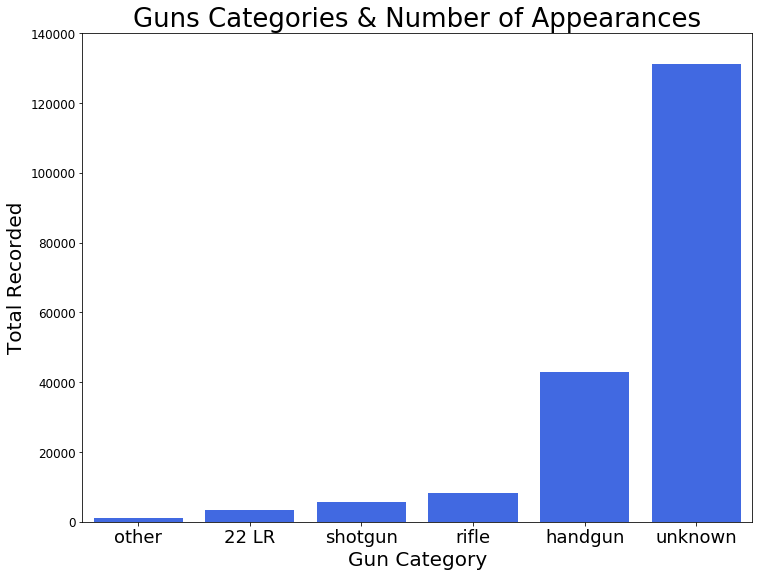

In [3]:
types = ["unknown","handgun","handgun","rifle","shotgun","22 LR","handgun","handgun","handgun",
    "handgun","rifle","shotgun","other","rifle","handgun","handgun","handgun","shotgun",
    "handgun","rifle","shotgun","rifle","rifle","handgun","shotgun","rifle","shotgun"]

gun_category = pd.DataFrame({"Totals":most_common_guns["Total"],
                            "Type": types})
gun_category = gun_category.sort_values(["Type"], ascending=False)

gun_category_condensed = gun_category.groupby(['Type']).sum()

gun_category_condensed = gun_category_condensed.sort_values(["Totals"], ascending=True)

plt.bar(gun_category_condensed.index, gun_category_condensed["Totals"], color="royalblue", align="center")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)

plt.xlim(-0.5, len(gun_category_condensed.index)-0.5)
plt.ylim(0, max(gun_category_condensed["Totals"])+9000)

plt.title("Guns Categories & Number of Appearances", fontsize=26)
plt.xlabel("Gun Category", fontsize=20)
plt.ylabel("Total Recorded", fontsize=20)

figure = plt.gcf()
figure.set_size_inches(12, 9)

plt.savefig("guns_categories_total.png", dpi = 300, bbox_inches="tight")
plt.show()

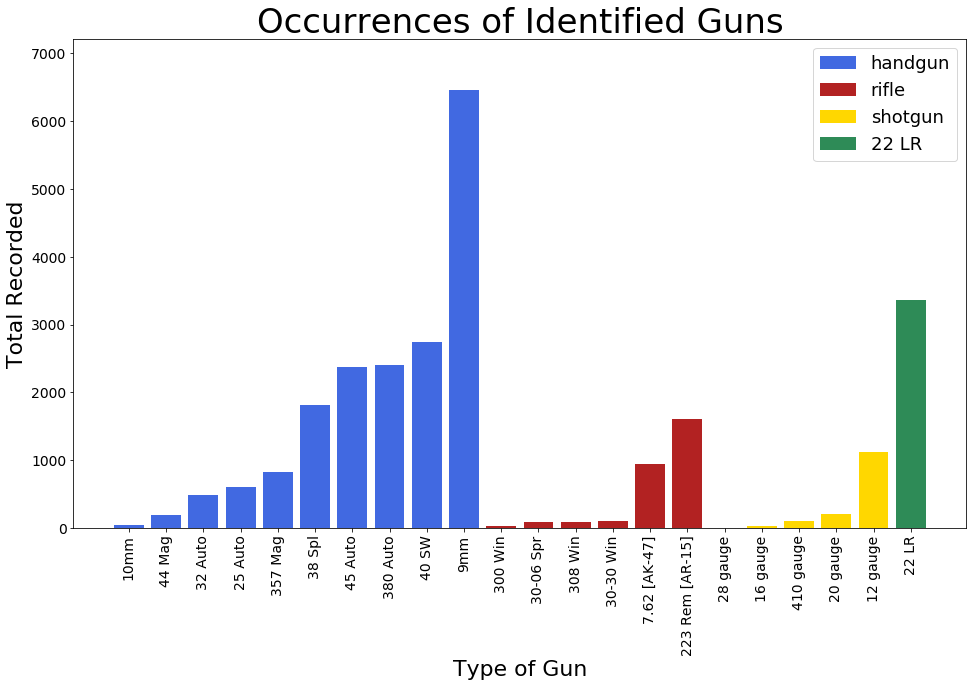

In [4]:
gun_category_clean = gun_category.drop(['Unknown', 'Handgun', 'Rifle', 'Shotgun', 'Other'])
gun_category_clean = gun_category_clean.sort_values(["Totals"], ascending=True)


gun_category_clean["Colors"] = gun_category_clean["Type"]
gun_category_clean["Colors"] = gun_category_clean["Colors"].replace(
    {'shotgun': 'gold', 'rifle': 'firebrick', 'handgun': 'royalblue', '22 LR': 'seagreen'})


bar_handgun = gun_category_clean.loc[gun_category_clean["Type"] == "handgun", :]
bar_rifle = gun_category_clean.loc[gun_category_clean["Type"] == "rifle", :]
bar_shotgun = gun_category_clean.loc[gun_category_clean["Type"] == "shotgun", :]
bar_22_lr = gun_category_clean.loc[gun_category_clean["Type"] == "22 LR", :]

plt.bar(bar_handgun.index, bar_handgun["Totals"], color=bar_handgun["Colors"], align="center")
plt.bar(bar_rifle.index, bar_rifle["Totals"], color=bar_rifle["Colors"], align="center")
plt.bar(bar_shotgun.index, bar_shotgun["Totals"], color=bar_shotgun["Colors"], align="center")
plt.bar(bar_22_lr.index, bar_22_lr["Totals"], color=bar_22_lr["Colors"], align="center")

plt.xticks(rotation="vertical", fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0, max(bar_handgun["Totals"])+750)

plt.title("Occurrences of Identified Guns", fontsize=34)
plt.xlabel("Type of Gun", fontsize=22)
plt.ylabel("Total Recorded", fontsize=22)


types = ['handgun', 'rifle', 'shotgun', '22 LR']

plt.legend(types, fontsize=18)

figure = plt.gcf()
figure.set_size_inches(16, 9)

plt.savefig("guns_specifics_total.png", dpi = 300, bbox_inches="tight")
plt.show()

In [5]:
split_by_gun_df["state"] = gun_violence_pd["state"]

index_by_state = split_by_gun_df.set_index('state')



split_by_gun_illinois = index_by_state.loc["Illinois", :]
gun_total_illinois = split_by_gun_illinois.apply(pd.value_counts)                                                                 
gun_total_illinois["Total"] = gun_total_illinois.sum(axis=1)
most_common_guns_illinois = gun_total_illinois.sort_values(["Total"], ascending=False)
illinois_pd = pd.DataFrame(most_common_guns_illinois["Total"])
illinois_pd = illinois_pd.rename(columns={"Total":"Illinois"}) 
illinois_pd = illinois_pd.reset_index()

split_by_gun_california = index_by_state.loc["California", :]
gun_total_california = split_by_gun_california.apply(pd.value_counts)                                                               
gun_total_california["Total"] = gun_total_california.sum(axis=1)
most_common_guns_california = gun_total_california.sort_values(["Total"], ascending=False)
california_pd = pd.DataFrame(most_common_guns_california["Total"])
california_pd = california_pd.rename(columns={"Total":"California"}) 
california_pd = california_pd.reset_index()

split_by_gun_florida = index_by_state.loc["Florida", :]
gun_total_florida = split_by_gun_florida.apply(pd.value_counts)                                                                
gun_total_florida["Total"] = gun_total_florida.sum(axis=1)
most_common_guns_florida = gun_total_florida.sort_values(["Total"], ascending=False)
florida_pd = pd.DataFrame(most_common_guns_florida["Total"])
florida_pd = florida_pd.rename(columns={"Total":"Florida"}) 
florida_pd = florida_pd.reset_index()


split_by_gun_texas = index_by_state.loc["Texas", :]
gun_total_texas = split_by_gun_texas.apply(pd.value_counts)                                                                   
gun_total_texas["Total"] = gun_total_texas.sum(axis=1)
most_common_guns_texas = gun_total_texas.sort_values(["Total"], ascending=False)
texas_pd = pd.DataFrame(most_common_guns_texas["Total"])
texas_pd = texas_pd.rename(columns={"Total":"Texas"}) 
texas_pd = texas_pd.reset_index()


split_by_gun_ohio = index_by_state.loc["Ohio", :]
gun_total_ohio = split_by_gun_ohio.apply(pd.value_counts)                                                                   
gun_total_ohio["Total"] = gun_total_ohio.sum(axis=1)
most_common_guns_ohio = gun_total_ohio.sort_values(["Total"], ascending=False)
ohio_pd = pd.DataFrame(most_common_guns_ohio["Total"])
ohio_pd = ohio_pd.rename(columns={"Total":"Ohio"}) 
ohio_pd = ohio_pd.reset_index()


top_five_state_pd = pd.merge(illinois_pd, california_pd, how="outer")
top_five_state_pd = pd.merge(top_five_state_pd, florida_pd, how="outer")
top_five_state_pd = pd.merge(top_five_state_pd, texas_pd, how="outer")
top_five_state_pd = pd.merge(top_five_state_pd, ohio_pd, how="outer")
top_five_state_pd = top_five_state_pd.rename(columns={"index":"Gun"}) 


types_states = ["unknown","handgun","handgun","rifle","shotgun","22 LR","handgun","handgun","handgun",
    "handgun","rifle","shotgun","other","rifle","handgun","handgun","handgun","shotgun",
    "handgun","rifle","shotgun","rifle","rifle","handgun","shotgun","rifle","shotgun"]



top_five_state_pd["Category"] = types_states
top_five_state_pd = top_five_state_pd.set_index("Category")
top_five_state_pd = top_five_state_pd.drop("Gun", 1)


top_five_state_pd_condensed = top_five_state_pd.groupby('Category')
top_five_state_pd_condensed.sum()

,Illinois,California,Florida,Texas,Ohio
Category,,,,,
22 LR,101.0,155.0,186.0,132.0,102.0
handgun,1545.0,2352.0,2870.0,2336.0,1724.0
other,28.0,49.0,49.0,92.0,45.0
rifle,197.0,711.0,453.0,443.0,243.0
shotgun,156.0,478.0,279.0,299.0,205.0
unknown,11497.0,13224.0,9370.0,6483.0,6746.0
